In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

In [ ]:
from google.colab import files
upload = files.upload()

Saving listing7.4.xlsx to listing7.4.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(upload['listing7.4.xlsx']))

In [ ]:
# numeric_df = df.select_dtypes(include=[np.number])
numeric_df = df.drop(columns=['id', 'T', 'longitude', 'latitude', 'price', 'F', 'host_since', 'accommodates',
    'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_nights_avg_ntm', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value',
    'calculated_host_listings_count_entire_homes']).select_dtypes(include=[np.number])

In [ ]:
correlation_matrix = numeric_df.corr()

In [ ]:
# Drop the columns from the DataFrame
# numeric_df_without_id = df.drop(columns=['id','T','longitude','latitude']).select_dtypes(include=[np.number])

In [ ]:
correlation_with_revenue = correlation_matrix['revenue'].drop('revenue').sort_values(ascending=False)

<ipython-input-27-98616cf3e352>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette='coolwarm')


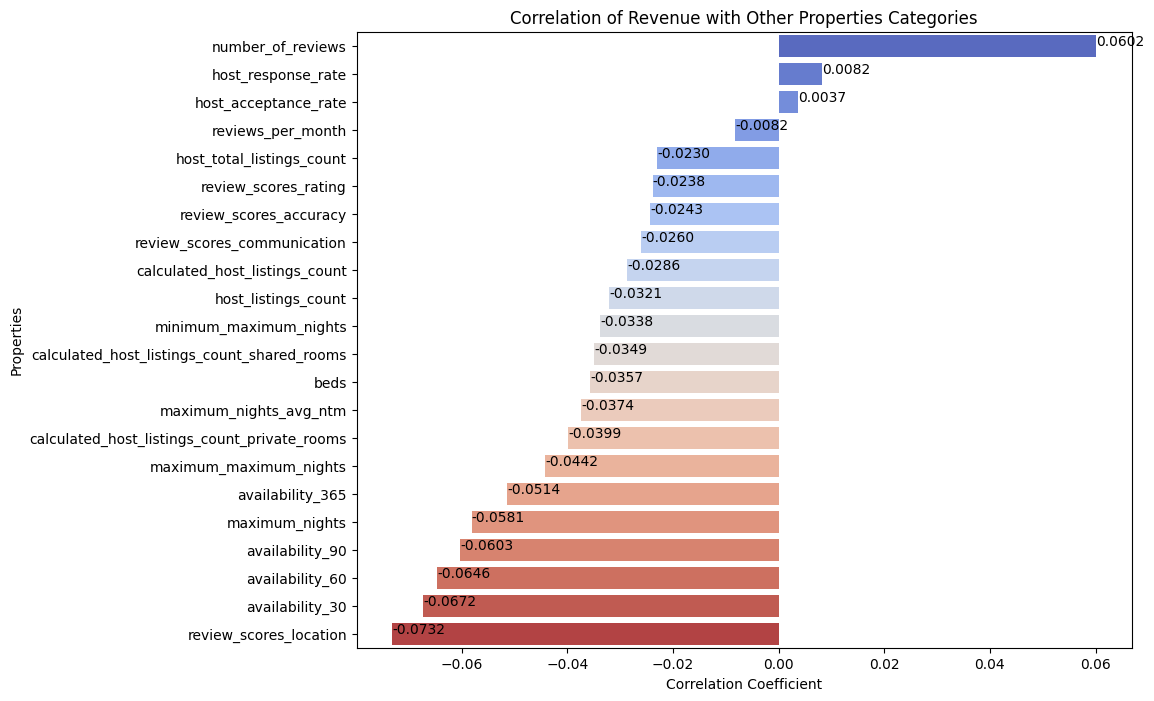

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette='coolwarm')
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette='coolwarm')
plt.title('Correlation of Revenue with Other Properties Categories')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Properties')
for index, value in enumerate(correlation_with_revenue.values):
    plt.text(value, index, f'{value:.4f}')
plt.show()

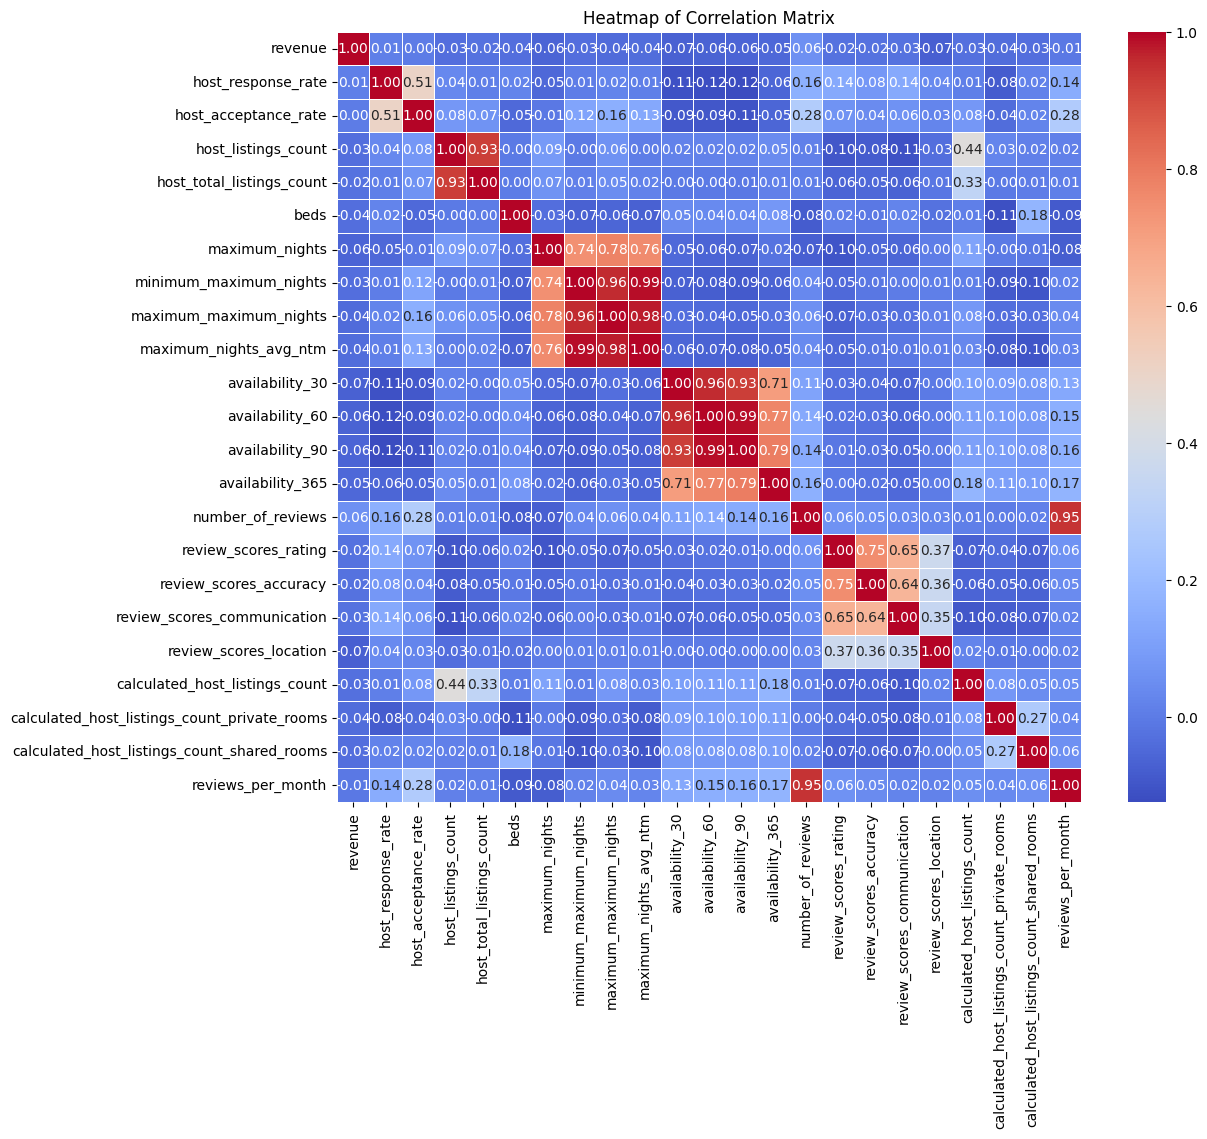

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

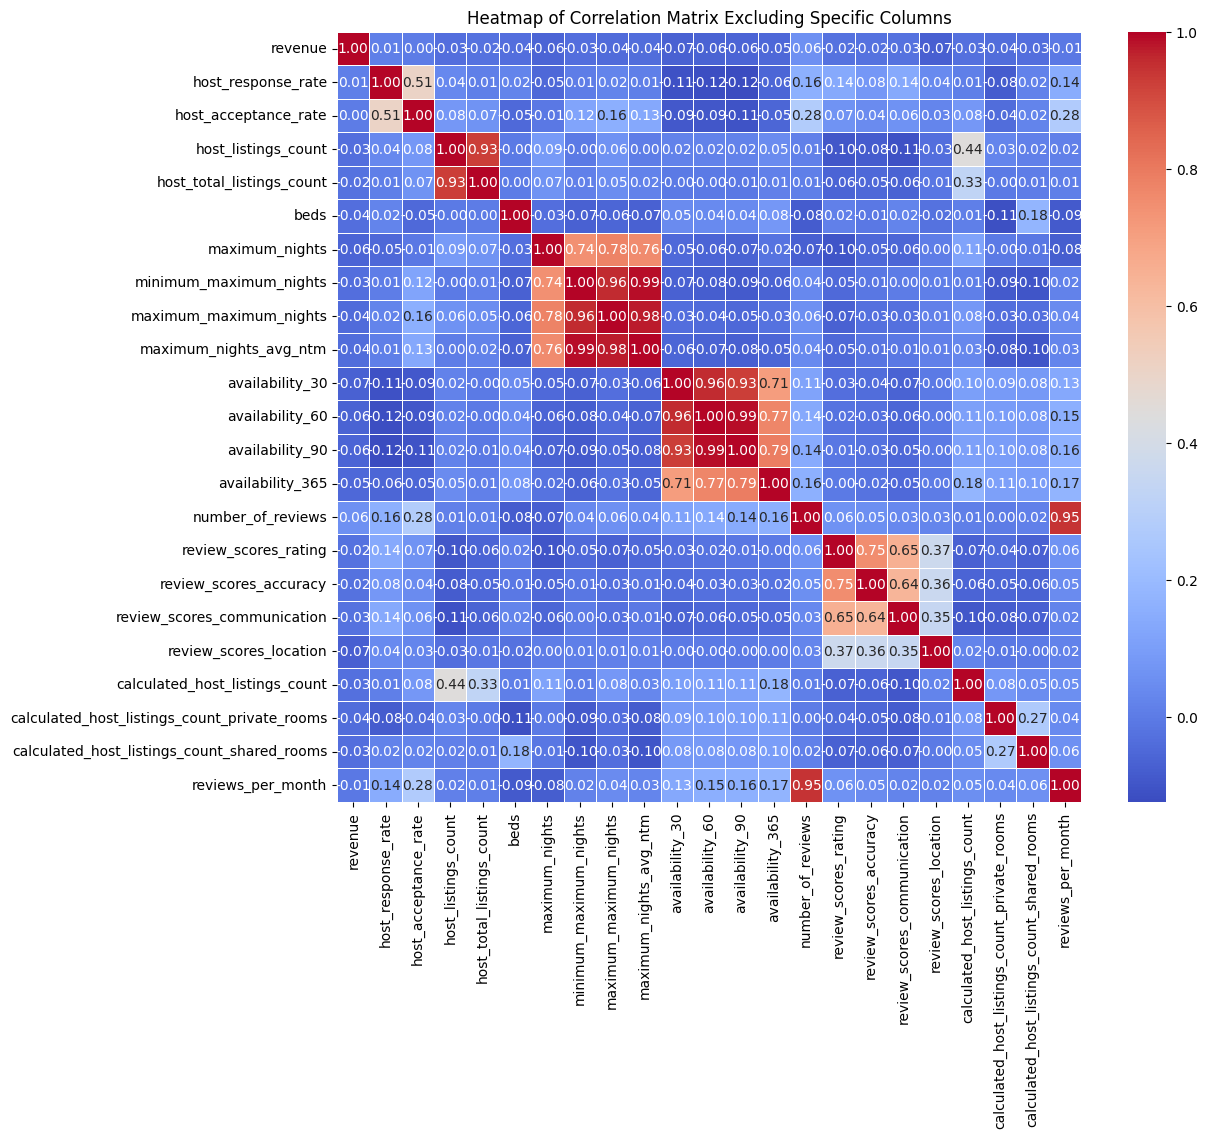

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# List of columns to drop
columns_to_drop = [
    'id','T', 'longitude', 'latitude', 'price', 'F', 'host_since', 'accommodates',
    'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_nights_avg_ntm', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value',
    'calculated_host_listings_count_entire_homes'
]

# Drop specified columns and select only numeric ones
numeric_df = df.drop(columns=columns_to_drop).select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix Excluding Specific Columns')
plt.show()


In [ ]:
print(df.columns)

Index(['id', 'F', 'T', 'price', 'revenue', 'last_scraped', 'source',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_acc

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Identify categorical columns for encoding
categorical_columns = ['property_type', 'room_type', 'host_is_superhost']

# Initialize OneHotEncoder from Scikit-learn
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Perform one-hot encoding on the categorical columns
encoded_columns = onehot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded variables, naming the columns appropriately
encoded_columns_names = onehot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_columns_names)

# Concatenate the original DataFrame with the new encoded variables
# This assumes that the original DataFrame and the encoded DataFrame have the same index
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns since they have been encoded
df.drop(columns=categorical_columns, inplace=True)

# Now we exclude any non-numeric columns that are left in the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Extract the correlation of 'revenue' with the encoded categorical variables
correlation_with_revenue = correlation_matrix.loc['revenue', encoded_columns_names]

# Print the correlation values
print(correlation_with_revenue.sort_values(ascending=False))



property_type_Private room in townhouse            0.048932
property_type_Private room in rental unit          0.043981
property_type_Entire rental unit                   0.038632
property_type_Private room in villa                0.031496
property_type_Entire vacation home                 0.030242
room_type_Private room                             0.026064
property_type_Private room in nature lodge         0.025565
property_type_Private room in home                 0.021315
property_type_Entire bungalow                      0.020286
property_type_Private room in tiny home            0.018626
property_type_Private room in bed and breakfast    0.015175
property_type_Shared room in home                  0.013131
property_type_Entire chalet                        0.012348
property_type_Private room in loft                 0.010108
property_type_Treehouse                            0.009336
property_type_Private room in guest suite          0.008445
property_type_Entire loft               

<ipython-input-13-c7e34db89787>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette = 'tab10')


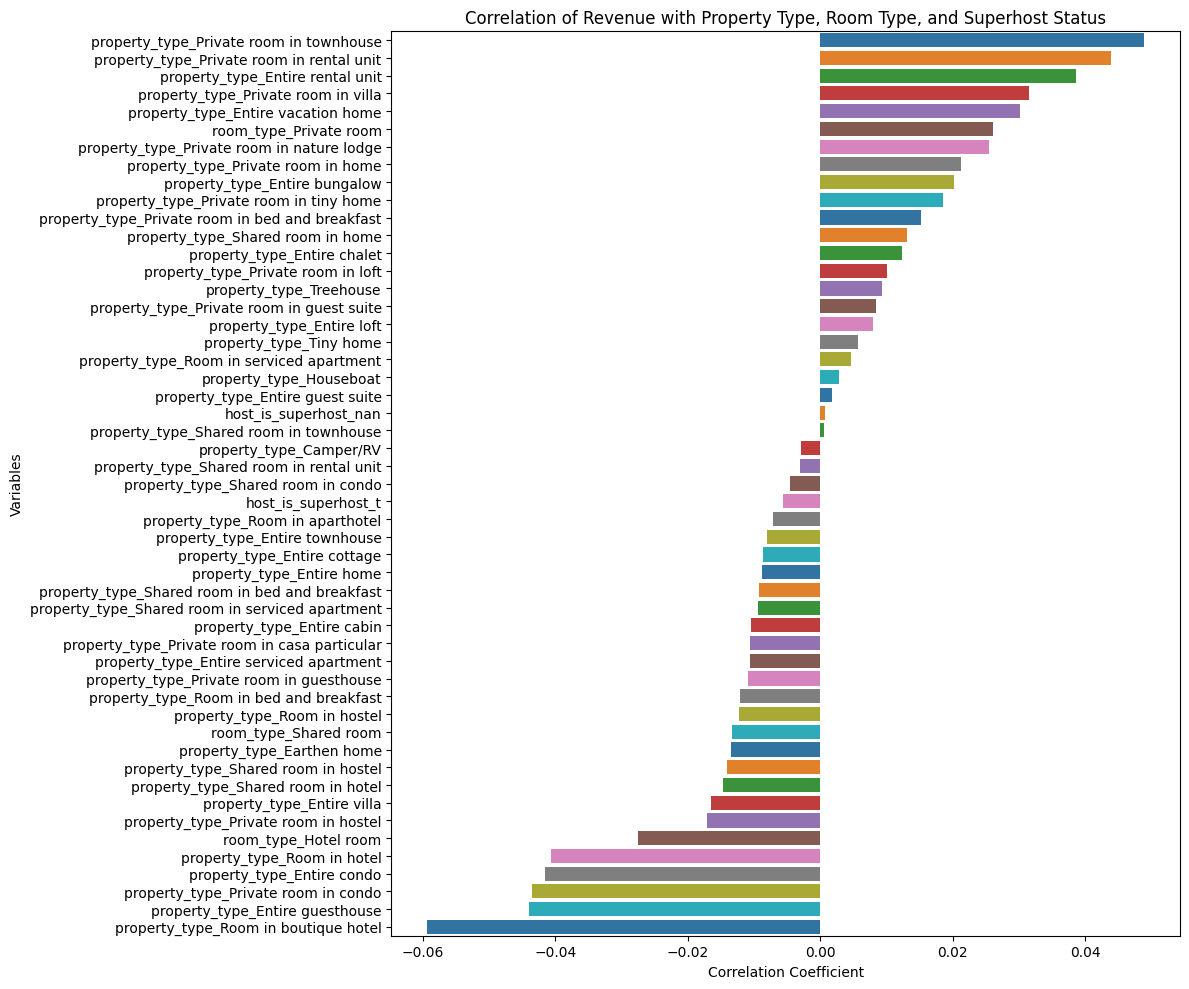

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_with_revenue = correlation_with_revenue.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=correlation_with_revenue.values, y=correlation_with_revenue.index, palette = 'tab10')

# Set the title and labels of the plot
plt.title('Correlation of Revenue with Property Type, Room Type, and Superhost Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')

# Display the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


<ipython-input-14-5a7c2f3cfdbe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_correlation_with_revenue.values, y=filtered_correlation_with_revenue.index, palette = 'tab10')


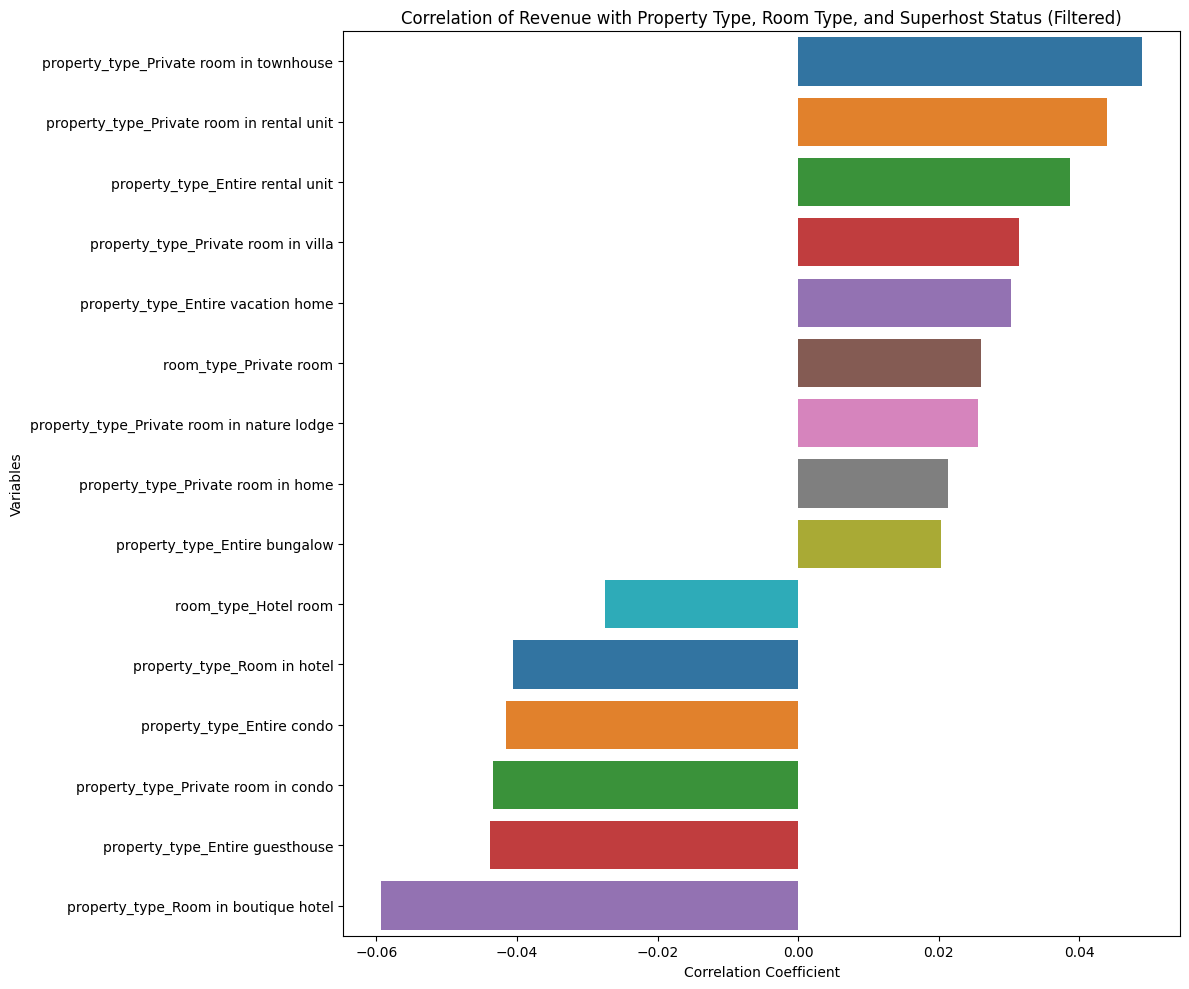

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out correlations between -0.02 and 0.02
filtered_correlation_with_revenue = correlation_with_revenue[(correlation_with_revenue > 0.02) | (correlation_with_revenue < -0.02)]

# Create a bar plot with the filtered correlations
plt.figure(figsize=(12, 10))
sns.barplot(x=filtered_correlation_with_revenue.values, y=filtered_correlation_with_revenue.index, palette = 'tab10')

# Set the title and labels of the plot
plt.title('Correlation of Revenue with Property Type, Room Type, and Superhost Status (Filtered)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')

# Display the plot
plt.tight_layout()
plt.show()



<ipython-input-15-ff9a4dab6dba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=filtered_correlation_with_revenue.values, y=filtered_correlation_with_revenue.index, palette = 'tab10')


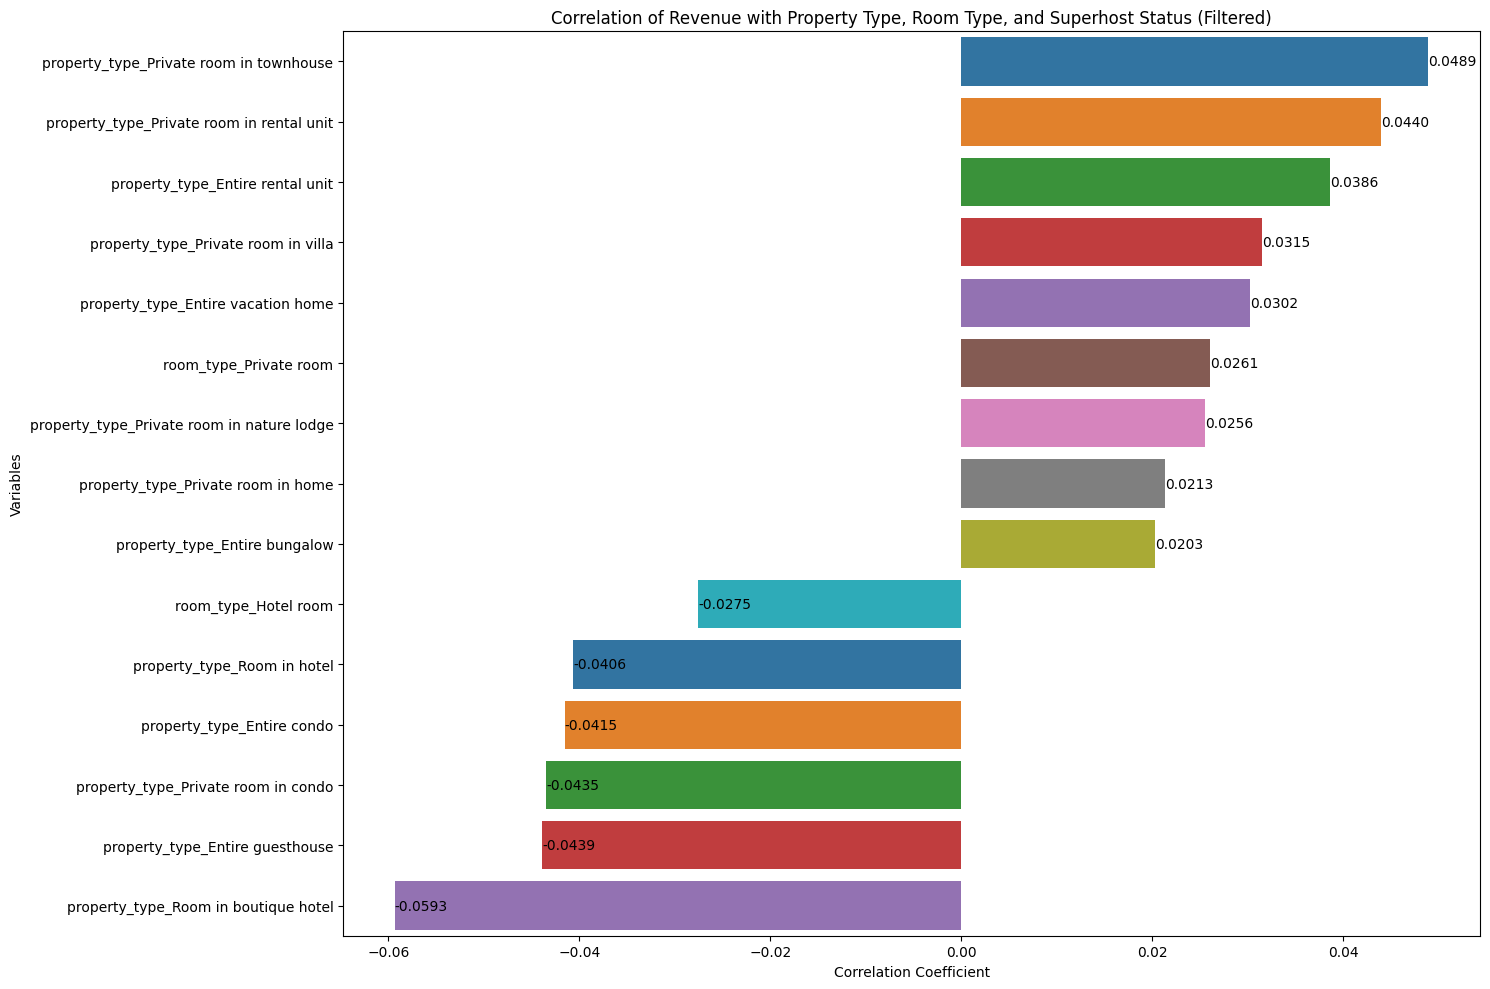

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_correlation_with_revenue' contains the filtered correlations
plt.figure(figsize=(15, 10))
barplot = sns.barplot(x=filtered_correlation_with_revenue.values, y=filtered_correlation_with_revenue.index, palette = 'tab10')

# Set the title and labels of the plot
plt.title('Correlation of Revenue with Property Type, Room Type, and Superhost Status (Filtered)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')

# Add labels to each bar
for index, value in enumerate(filtered_correlation_with_revenue.values):
    # The parameters (x, y) determine the label's position
    # x is set to the value (correlation coefficient) plus a small offset to place it outside the bar
    # y is set to the index, which corresponds to the bar's position on the y-axis
    # The label itself is the value formatted to 4 decimal places
    plt.text(value, index, f'{value:.4f}', color='black', va='center')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Convert the filtered correlation Series to a DataFrame for easier Excel output
correlation_df = filtered_correlation_with_revenue.reset_index()
correlation_df.columns = ['Variable', 'CorrelationCoefficient']

# Save the correlation DataFrame to an Excel file
correlation_df.to_excel('filtered_correlation_with_revenue.xlsx', index=False)
